<a href="https://colab.research.google.com/github/tasmia008/Integrating-Supervised-Unsupervised-and-Self-Supervised-Models-for-an-Enhanced-PCOS-Detection/blob/main/Integrating_Supervised_%2CUnsupervised_and_Self_Supervised_Models_for_an_Enhanced_PCOS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier, LassoCV, ElasticNetCV, PassiveAggressiveClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, log_loss, cohen_kappa_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
df=pd.read_csv("/content/Full_new.csv")
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,537,537,0,35,50.0,164.592,18.500000,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
536,538,538,0,30,63.2,158.000,25.300000,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
537,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
538,540,540,0,27,50.0,150.000,22.200000,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [102]:
df_inf = pd.read_csv('/content/PCOS_infertility.csv')
df_inf.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
5,6,10006,0,237.97,1.99,6.74
6,7,10007,0,1.99,1.99,3.05
7,8,10008,0,100.51,100.51,1.54
8,9,10009,0,1.99,1.99,1
9,10,10010,0,1.99,1.99,1.61


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  540 non-null    int64  
 1   Patient File No.        540 non-null    int64  
 2   PCOS (Y/N)              540 non-null    int64  
 3    Age (yrs)              540 non-null    int64  
 4   Weight (Kg)             540 non-null    float64
 5   Height(Cm)              540 non-null    float64
 6   BMI                     540 non-null    float64
 7   Blood Group             540 non-null    int64  
 8   Pulse rate(bpm)         540 non-null    int64  
 9   RR (breaths/min)        540 non-null    int64  
 10  Hb(g/dl)                540 non-null    float64
 11  Cycle(R/I)              540 non-null    int64  
 12  Cycle length(days)      540 non-null    int64  
 13  Marraige Status (Yrs)   539 non-null    float64
 14  Pregnant(Y/N)           540 non-null    in

In [104]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


In [105]:
df.drop("Unnamed: 44",axis=1,inplace=True)

In [106]:
df.isna().values.any()

np.True_

In [107]:
df['Patient File No.'] = df['Patient File No.'].apply(lambda x:  x+10000).astype('int64')

In [108]:
df = pd.merge(df,df_inf[['Patient File No.','  I   beta-HCG(mIU/mL)','II    beta-HCG(mIU/mL)']], on='Patient File No.', how='left')

In [109]:
df.isnull().sum()

,0
Sl. No,0
Patient File No.,0
PCOS (Y/N),0
Age (yrs),0
Weight (Kg),0
Height(Cm),0
BMI,0
Blood Group,0
Pulse rate(bpm),0
RR (breaths/min),0


In [110]:
df['Marraige Status (Yrs)'].fillna(0,inplace = True)
df['Fast food (Y/N)'].fillna(0,inplace = True)

<ipython-input-110-f247b3b72cc1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Marraige Status (Yrs)'].fillna(0,inplace = True)
<ipython-input-110-f247b3b72cc1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [111]:
df.isna().values.any()

np.False_

In [112]:
df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,...,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,270.935185,10270.935185,0.327778,31.420370,59.643889,156.493141,24.311420,13.803704,73.246296,19.242593,...,0.246296,114.651852,76.940741,6.133333,6.644444,15.014444,15.450685,8.481241,665.702104,238.666999
std,156.455182,156.455182,0.469839,5.410698,11.037399,6.036043,4.060159,1.842194,4.434274,1.689881,...,0.431253,7.387819,5.571279,4.232220,4.440439,3.569123,3.321841,2.163840,3351.918286,1605.281001
min,1.000000,10001.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.300000,0.110417
25%,135.750000,10135.750000,0.000000,27.750000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000,1.990000,1.990000
50%,270.500000,10270.500000,0.000000,31.000000,59.300000,156.000000,24.229840,14.000000,72.000000,18.000000,...,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000,19.375000,1.990000
75%,406.250000,10406.250000,1.000000,35.000000,65.000000,160.000000,26.642885,15.000000,74.000000,20.000000,...,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000,298.040000,98.145000
max,541.000000,10541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000,32460.970000,25000.000000


In [113]:
df['PCOS (Y/N)'].value_counts()

,count
PCOS (Y/N),
0,363
1,177


In [114]:
df.drop(index=306)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),I beta-HCG(mIU/mL)_y,II beta-HCG(mIU/mL)_y
0,1,10001,0,28,44.6,152.000,19.300000,15,78,22,...,0,110,80,3,3,18.0,18.0,8.5,1.99,1.99
1,2,10002,0,36,65.0,161.500,24.921163,15,74,20,...,0,120,70,3,5,15.0,14.0,3.7,60.80,1.99
2,3,10003,1,33,68.8,165.000,25.270891,11,72,18,...,0,120,80,13,15,18.0,20.0,10.0,494.08,494.08
3,4,10004,0,37,65.0,148.000,29.674945,13,72,20,...,0,120,70,2,2,15.0,14.0,7.5,1.99,1.99
4,5,10005,0,25,52.0,161.000,20.060954,11,72,18,...,0,120,80,3,4,16.0,14.0,7.0,801.45,801.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,537,10537,0,35,50.0,164.592,18.500000,17,72,16,...,0,110,70,1,0,17.5,10.0,6.7,1.99,1.99
536,538,10538,0,30,63.2,158.000,25.300000,15,72,18,...,0,110,70,9,7,19.0,18.0,8.2,80.13,1.99
537,539,10539,0,36,54.0,152.000,23.400000,13,74,20,...,0,110,80,1,0,18.0,9.0,7.3,1.99,1.99
538,540,10540,0,27,50.0,150.000,22.200000,15,74,20,...,0,110,70,7,6,18.0,16.0,11.5,292.92,1.99


In [115]:
df.rename(columns={'PCOS (Y/N)':'PCOS'}, inplace=True)

In [116]:
df.drop("Sl. No",axis=1,inplace=True)

In [117]:
df.drop("Patient File No.",axis=1,inplace=True)

In [118]:
from imblearn.over_sampling import ADASYN
import pandas as pd

X = df.drop('PCOS', axis=1)
y = df['PCOS']

adasyn = ADASYN(sampling_strategy='all', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='PCOS')], axis=1)
df = df_resampled.copy()

In [119]:
df['PCOS'].value_counts()

,count
PCOS,
1,366
0,363


<ipython-input-120-18dbee4dbf3e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PCOS',data=df,palette=["#FF0000","#0000FF"])


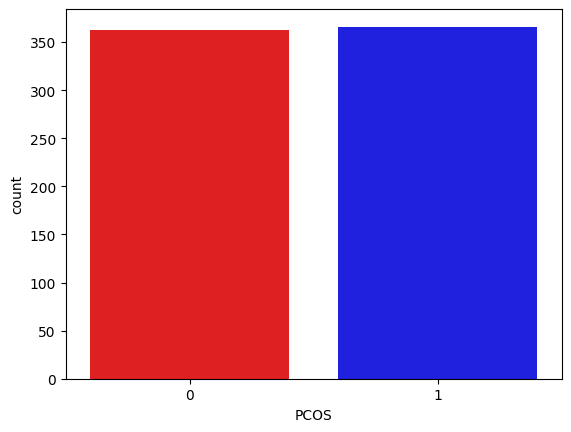

In [120]:
sns.countplot(x='PCOS',data=df,palette=["#FF0000","#0000FF"])
plt.show()

In [121]:
desc = pd.DataFrame(index = df.columns)
desc['count'] = df.count()
desc['nunique'] = df.nunique()
desc['%unique'] = desc['nunique'] / len(df) * 100
desc['null'] = df.isnull().sum()
desc['type'] = df.dtypes
desc = pd.concat([desc, df.describe().T], axis = 1)
desc

,count,nunique,%unique,null,type,count,mean,std,min,25%,50%,75%,max
Age (yrs),729,29,3.978052,0,int64,729.0,30.886145,5.281570,20.000000,27.000000,30.000000,34.000000,48.000000
Weight (Kg),729,295,40.466392,0,float64,729.0,60.370377,11.014984,31.000000,53.000000,60.000000,67.000000,108.000000
Height(Cm),729,225,30.864198,0,float64,729.0,156.685561,5.837869,137.000000,152.000000,156.547668,160.573083,180.000000
BMI,729,544,74.622771,0,float64,729.0,24.544818,4.030243,12.417882,21.900000,24.500000,27.031250,38.900000
Blood Group,729,8,1.097394,0,int64,729.0,13.707819,1.780066,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),729,14,1.920439,0,int64,729.0,73.253772,3.964480,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),729,11,1.508916,0,int64,729.0,19.165981,1.574573,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),729,221,30.315501,0,float64,729.0,11.176728,0.824644,8.500000,10.642387,11.000000,11.720066,14.800000
Cycle(R/I),729,4,0.548697,0,int64,729.0,2.629630,0.892582,2.000000,2.000000,2.000000,4.000000,5.000000
Cycle length(days),729,12,1.646091,0,int64,729.0,4.724280,1.525237,0.000000,4.000000,5.000000,5.000000,12.000000


In [122]:
# Check for negative values in each column
columns_with_negative_values = df.columns[df.lt(0).any()]

# Display the columns with negative values
print("Columns with negative values:", columns_with_negative_values)

Columns with negative values: Index([], dtype='object')


In [123]:
df.shape

(729, 44)

In [124]:
df.columns

Index([' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', '  I   beta-HCG(mIU/mL)_x',
       'II    beta-HCG(mIU/mL)_x', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y', 'PCOS'],
      dtype='object')

In [125]:
prediction_var = [' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', '  I   beta-HCG(mIU/mL)_x',
       'II    beta-HCG(mIU/mL)_x', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH',
       'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)',
       'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       '  I   beta-HCG(mIU/mL)_y', 'II    beta-HCG(mIU/mL)_y']

In [126]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [127]:
train_X = train[prediction_var]
train_y=train['PCOS']
test_X= test[prediction_var]
test_y =test['PCOS']

In [128]:
print(train.shape)
print(test.shape)

(583, 44)
(146, 44)


In [129]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.fit_transform(test_X)

In [130]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, PassiveAggressiveClassifier

def models(train_X, train_y):
    #Logistic Regression    0
    log = LogisticRegression(random_state = 51, penalty = 'l2')
    log.fit(train_X,train_y)

    #Random Forest         1
    forest=RandomForestClassifier(n_estimators=2,criterion='entropy',random_state=42)
    forest.fit(train_X,train_y)


    # Decision tree        2
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=1, random_state=42)
    tree.fit(train_X,train_y)


    #Gradient Bosting    8
    gb_clf = GradientBoostingClassifier (n_estimators=30,max_features=1,random_state=42)
    gb_clf.fit(train_X,train_y)

    # Support Vector Machines 4
    svm_params = {'C': 10, 'kernel': 'rbf'}
    svm = SVC(**svm_params, probability=True, random_state=25)
    svm.fit(train_X, train_y)

    # k-Nearest Neighbors 5
    classifier =KNeighborsClassifier(algorithm="auto", leaf_size=30, metric="minkowski",metric_params=None, n_jobs=1, n_neighbors=5, p=2,weights="uniform")
    classifier.fit(train_X,train_y)

    #Adaboost Classifier   6
    clf = AdaBoostClassifier(n_estimators=100, random_state=30)
    clf.fit(train_X,train_y)

    # Gaussian 7
    gnb_params = {}
    gause_clf = GaussianNB(**gnb_params)
    gause_clf.fit(train_X, train_y)

    # Quadratic Discriminant Analysis 8
    qda_params = {'reg_param': 0.2}
    qda = QuadraticDiscriminantAnalysis(**qda_params)
    qda.fit(train_X, train_y)

    # Ridge Classifier 9
    ridge_params = {'alpha': 1}
    ridge = RidgeClassifier(**ridge_params, random_state=42)
    ridge.fit(train_X, train_y)

    # Passive Aggressive Classifier 10
    pa_params = {'C': 0.01, 'max_iter': 1000}
    passive_aggressive = PassiveAggressiveClassifier(**pa_params, random_state=42)
    passive_aggressive.fit(train_X, train_y)

    print('[0]Logistic Regression Training Accuracy:', log.score(train_X, train_y))
    print('[1]Random Forest Training Accuracy:', forest.score(train_X, train_y))
    print('[2]Decision tree Training Accuracy:', tree.score(train_X, train_y))
    print('[3]Gradient Boosting Training Accuracy:', gb_clf.score(train_X, train_y))
    print('[4]Support Vector Machines Training Accuracy:', svm.score(train_X, train_y))
    print('[5]k-Nearest Neighbors Training Accuracy:', classifier.score(train_X, train_y))
    print('[6]Adaboost Classifier Training Accuracy:', clf.score(train_X, train_y))
    print('[7]Gaussian Training Accuracy:', gause_clf.score(train_X, train_y))
    print('[8]Quadratic Discriminant Analysis Training Accuracy:', qda.score(train_X, train_y))
    print('[9]Ridge Classifier Training Accuracy:', ridge.score(train_X, train_y))
    print('[10]Passive Aggressive Classifier Training Accuracy:', passive_aggressive.score(train_X, train_y))

    return log, forest, tree, gb_clf, svm, classifier, clf, gause_clf, qda, ridge, passive_aggressive

In [131]:
model = models(train_X, train_y)

[0]Logistic Regression Training Accuracy: 0.902229845626072
[1]Random Forest Training Accuracy: 0.9210977701543739
[2]Decision tree Training Accuracy: 0.8164665523156089
[3]Gradient Boosting Training Accuracy: 0.9245283018867925
[4]Support Vector Machines Training Accuracy: 1.0
[5]k-Nearest Neighbors Training Accuracy: 0.9108061749571184
[6]Adaboost Classifier Training Accuracy: 0.9656946826758147
[7]Gaussian Training Accuracy: 0.8250428816466552
[8]Quadratic Discriminant Analysis Training Accuracy: 0.9468267581475128
[9]Ridge Classifier Training Accuracy: 0.9005145797598628
[10]Passive Aggressive Classifier Training Accuracy: 0.9193825042881647


Evaluation metrics for Logistic Regression :
Training time: 0.0082 seconds
Testing time: 0.0005 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        73
           1       0.88      0.88      0.88        73

    accuracy                           0.88       146
   macro avg       0.88      0.88      0.88       146
weighted avg       0.88      0.88      0.88       146

Testing accuracy: 87.67123287671232
Precision: 0.8767123287671232
Specificity: 0.8767123287671232
F1 score: 0.8767123287671232
Sensitivity/Recall: 0.8767123287671232
False positive rate: 0.1232876712328767
False negative: 0.1232876712328767
Negative Predictive Value: 0.8767123287671232
False Discovery Rate: 0.1232876712328767
Mean Absolute Error: 0.1232876712328767
R Squared Error: 0.5068493150684932
Root Mean Squared Error: 0.3511234415883917
Log Loss: 4.443738089069238
Cohen Kappa Score: 0.7534246575342466


[[64  9]
 [ 9 64]]


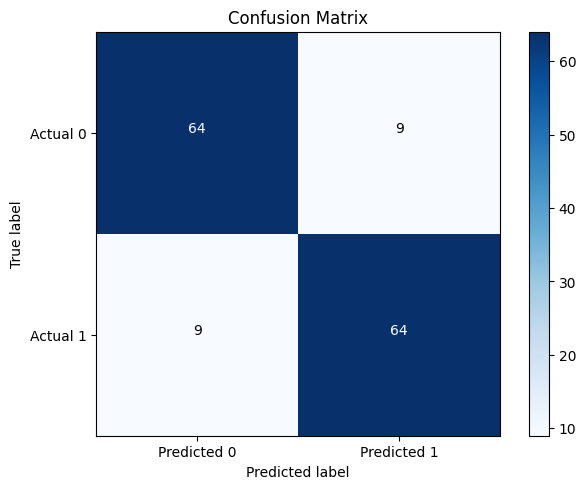

Evaluation metrics for Random Forest :
Training time: 0.0160 seconds
Testing time: 0.0010 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        73
           1       0.89      0.66      0.76        73

    accuracy                           0.79       146
   macro avg       0.81      0.79      0.78       146
weighted avg       0.81      0.79      0.78       146

Testing accuracy: 78.76712328767124
Precision: 0.9178082191780822
Specificity: 0.8888888888888888
F1 score: 0.8005974607916356
Sensitivity/Recall: 0.7282608695652174
False positive rate: 0.1111111111111111
False negative: 0.2717391304347826
Negative Predictive Value: 0.6575342465753424
False Discovery Rate: 0.0821917808219178
Mean Absolute Error: 0.21232876712328766
R Squared Error: 0.15068493150684936
Root Mean Squared Error: 0.4607914573028537
Log Loss: 7.653104486730354
Cohen Kappa Score: 0.5753424657534247


[[67  6]
 [25 48]]


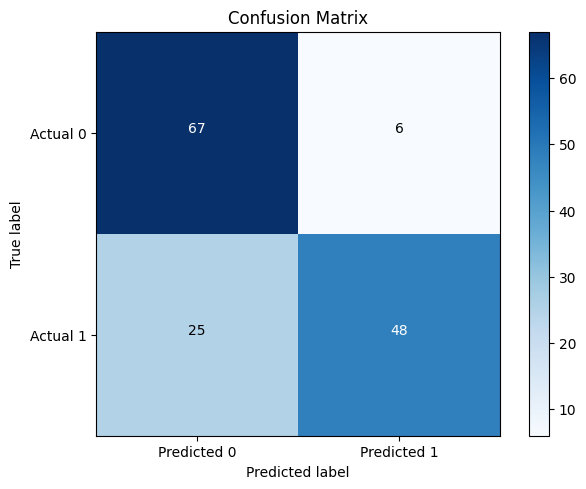

Evaluation metrics for Decision Tree :
Training time: 0.0092 seconds
Testing time: 0.0005 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        73
           1       0.82      0.74      0.78        73

    accuracy                           0.79       146
   macro avg       0.79      0.79      0.79       146
weighted avg       0.79      0.79      0.79       146

Testing accuracy: 78.76712328767124
Precision: 0.8356164383561644
Specificity: 0.8181818181818182
F1 score: 0.7893601725377427
Sensitivity/Recall: 0.7625
False positive rate: 0.18181818181818182
False negative: 0.2375
Negative Predictive Value: 0.7397260273972602
False Discovery Rate: 0.1643835616438356
Mean Absolute Error: 0.21232876712328766
R Squared Error: 0.15068493150684936
Root Mean Squared Error: 0.4607914573028537
Log Loss: 7.6531044867303555
Cohen Kappa Score: 0.5753424657534247


[[61 12]
 [19 54]]


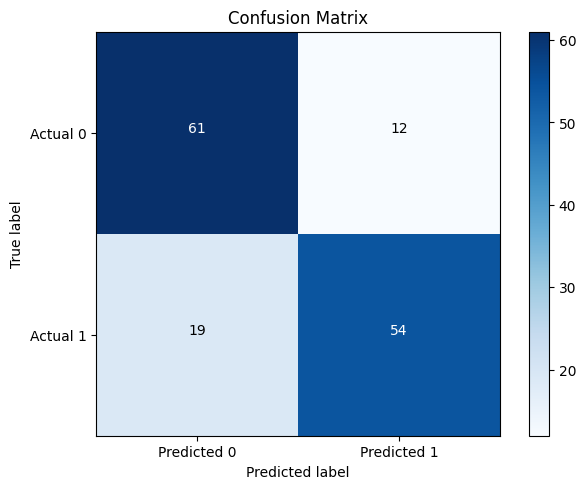

Evaluation metrics for Gradient Boosting :
Training time: 0.0508 seconds
Testing time: 0.0009 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        73
           1       0.85      0.88      0.86        73

    accuracy                           0.86       146
   macro avg       0.86      0.86      0.86       146
weighted avg       0.86      0.86      0.86       146

Testing accuracy: 86.3013698630137
Precision: 0.8493150684931506
Specificity: 0.8533333333333334
F1 score: 0.8631716336741354
Sensitivity/Recall: 0.8732394366197183
False positive rate: 0.14666666666666667
False negative: 0.1267605633802817
Negative Predictive Value: 0.8767123287671232
False Discovery Rate: 0.1506849315068493
Mean Absolute Error: 0.136986301369863
R Squared Error: 0.452054794520548
Root Mean Squared Error: 0.3701166050988026
Log Loss: 4.937486765632486
Cohen Kappa Score: 0.726027397260274


[[62 11]
 [ 9 64]]


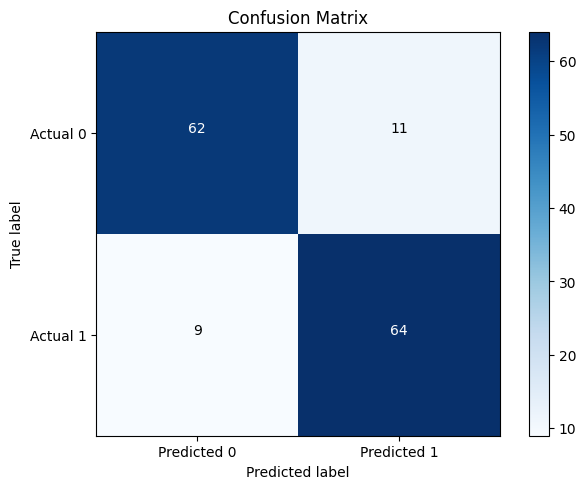

Evaluation metrics for SVM :
Training time: 0.0875 seconds
Testing time: 0.0039 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        73
           1       0.94      0.92      0.93        73

    accuracy                           0.93       146
   macro avg       0.93      0.93      0.93       146
weighted avg       0.93      0.93      0.93       146

Testing accuracy: 93.15068493150685
Precision: 0.9452054794520548
Specificity: 0.9436619718309859
F1 score: 0.9316807738814994
Sensitivity/Recall: 0.92
False positive rate: 0.056338028169014086
False negative: 0.08
Negative Predictive Value: 0.9178082191780822
False Discovery Rate: 0.0547945205479452
Mean Absolute Error: 0.0684931506849315
R Squared Error: 0.726027397260274
Root Mean Squared Error: 0.2617119612951068
Log Loss: 2.4687433828162435
Cohen Kappa Score: 0.863013698630137


[[69  4]
 [ 6 67]]


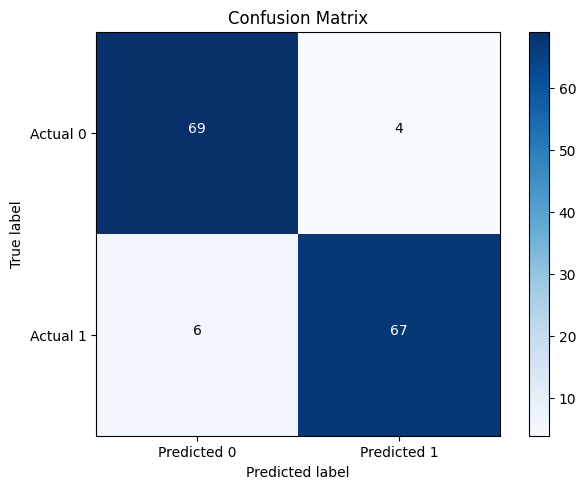

Evaluation metrics for k-Nearest Neighbors :
Training time: 0.0018 seconds
Testing time: 0.0149 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87        73
           1       0.83      0.95      0.88        73

    accuracy                           0.88       146
   macro avg       0.88      0.88      0.88       146
weighted avg       0.88      0.88      0.88       146

Testing accuracy: 87.67123287671232
Precision: 0.8082191780821918
Specificity: 0.8313253012048193
F1 score: 0.8807875378623973
Sensitivity/Recall: 0.9365079365079365
False positive rate: 0.1686746987951807
False negative: 0.06349206349206349
Negative Predictive Value: 0.9452054794520548
False Discovery Rate: 0.1917808219178082
Mean Absolute Error: 0.1232876712328767
R Squared Error: 0.5068493150684932
Root Mean Squared Error: 0.3511234415883917
Log Loss: 4.443738089069238
Cohen Kappa Score: 0.7534246575342466


[[59 14]
 [ 4 69]]


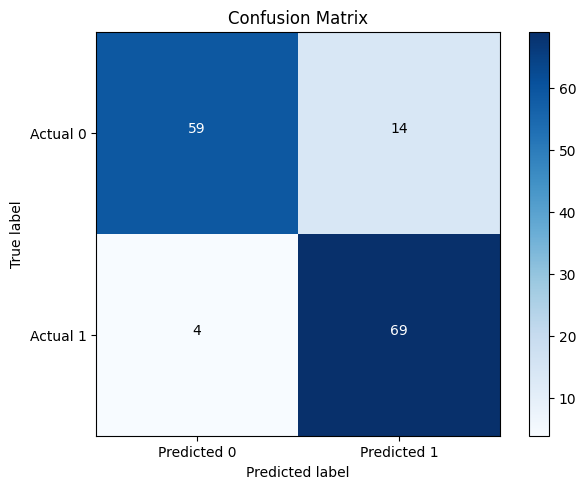

Evaluation metrics for Adaboost Classifier :
Training time: 0.4066 seconds
Testing time: 0.0250 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        73
           1       0.85      0.90      0.87        73

    accuracy                           0.87       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.87      0.87      0.87       146

Testing accuracy: 86.98630136986301
Precision: 0.8356164383561644
Specificity: 0.8461538461538461
F1 score: 0.8708630759247241
Sensitivity/Recall: 0.8970588235294118
False positive rate: 0.15384615384615385
False negative: 0.10294117647058823
Negative Predictive Value: 0.9041095890410958
False Discovery Rate: 0.1643835616438356
Mean Absolute Error: 0.13013698630136986
R Squared Error: 0.4794520547945206
Root Mean Squared Error: 0.3607450433496902
Log Loss: 4.690612427350862
Cohen Kappa Score: 0.7397260273972603


[[61 12]
 [ 7 66]]


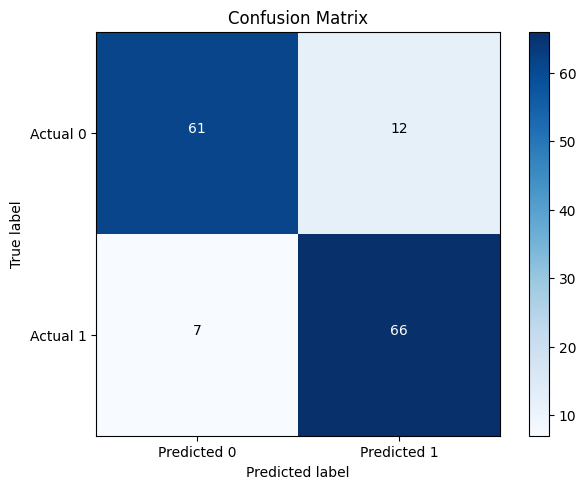

Evaluation metrics for Gaussian :
Training time: 0.0031 seconds
Testing time: 0.0005 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.12      0.21        73
           1       0.52      0.95      0.67        73

    accuracy                           0.53       146
   macro avg       0.61      0.53      0.44       146
weighted avg       0.61      0.53      0.44       146

Testing accuracy: 53.42465753424658
Precision: 0.1232876712328767
Specificity: 0.518796992481203
F1 score: 0.5931232091690545
Sensitivity/Recall: 0.6923076923076923
False positive rate: 0.48120300751879697
False negative: 0.3076923076923077
Negative Predictive Value: 0.9452054794520548
False Discovery Rate: 0.8767123287671232
Mean Absolute Error: 0.4657534246575342
R Squared Error: -0.8630136986301369
Root Mean Squared Error: 0.6824612990181452
Log Loss: 16.78745500315046
Cohen Kappa Score: 0.06849315068493156


[[ 9 64]
 [ 4 69]]


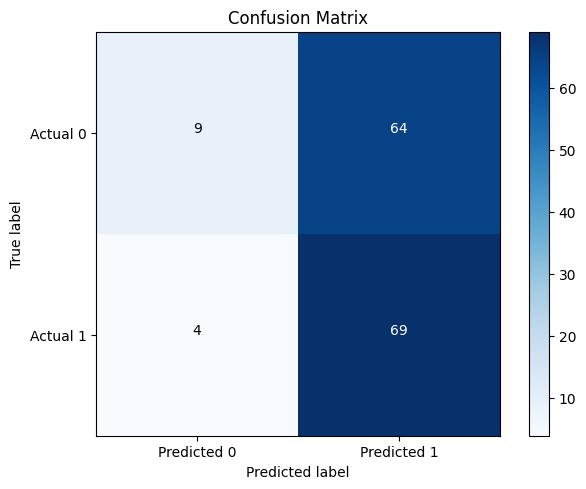

Evaluation metrics for Quadratic Discriminant Analysis :
Training time: 0.0163 seconds
Testing time: 0.0007 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.78        73
           1       0.75      0.88      0.81        73

    accuracy                           0.79       146
   macro avg       0.80      0.79      0.79       146
weighted avg       0.80      0.79      0.79       146

Testing accuracy: 79.45205479452055
Precision: 0.7123287671232876
Specificity: 0.7529411764705882
F1 score: 0.7996155694377702
Sensitivity/Recall: 0.8524590163934426
False positive rate: 0.24705882352941178
False negative: 0.14754098360655737
Negative Predictive Value: 0.8767123287671232
False Discovery Rate: 0.2876712328767123
Mean Absolute Error: 0.2054794520547945
R Squared Error: 0.17808219178082196
Root Mean Squared Error: 0.45329841391162456
Log Loss: 7.4062301484487305
Cohen Kappa Score: 0.589041095890411


[[52 21]
 [ 9 

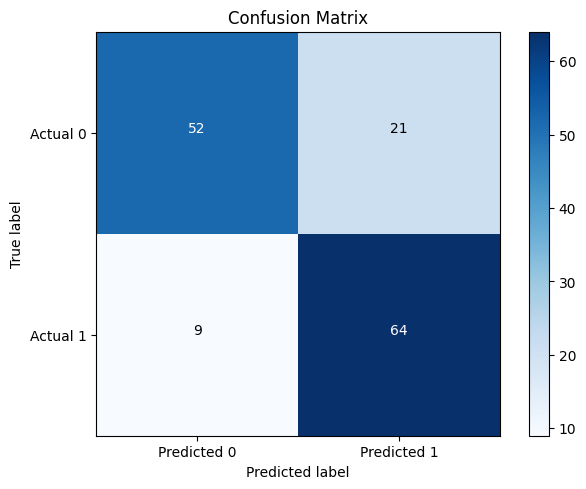

Evaluation metrics for Ridge Classifier :
Training time: 0.0228 seconds
Testing time: 0.0005 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        73
           1       0.89      0.88      0.88        73

    accuracy                           0.88       146
   macro avg       0.88      0.88      0.88       146
weighted avg       0.88      0.88      0.88       146

Testing accuracy: 88.35616438356165
Precision: 0.8904109589041096
Specificity: 0.8888888888888888
F1 score: 0.8836023789294817
Sensitivity/Recall: 0.8783783783783784
False positive rate: 0.1111111111111111
False negative: 0.12162162162162163
Negative Predictive Value: 0.8767123287671232
False Discovery Rate: 0.1095890410958904
Mean Absolute Error: 0.11643835616438356
R Squared Error: 0.5342465753424658
Root Mean Squared Error: 0.3412306495090726
Log Loss: 4.196863750787614
Cohen Kappa Score: 0.7671232876712328


[[65  8]
 [ 9 64]]


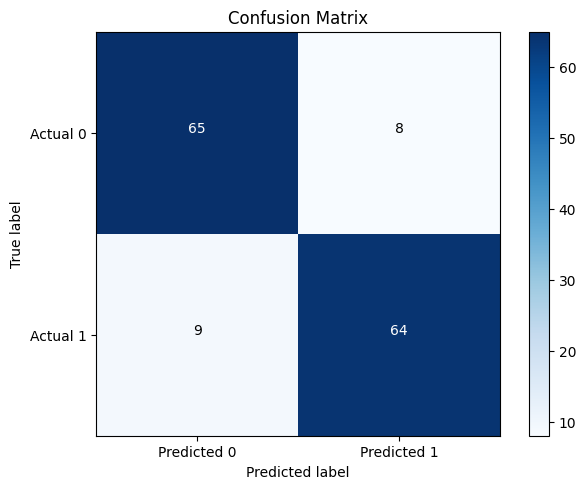

Evaluation metrics for Passive Aggressive Classifier :
Training time: 0.0067 seconds
Testing time: 0.0007 seconds
Classification report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        73
           1       0.86      0.89      0.87        73

    accuracy                           0.87       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.87      0.87      0.87       146

Testing accuracy: 86.98630136986301
Precision: 0.8493150684931506
Specificity: 0.8552631578947368
F1 score: 0.870222414165407
Sensitivity/Recall: 0.8857142857142857
False positive rate: 0.14473684210526316
False negative: 0.11428571428571428
Negative Predictive Value: 0.8904109589041096
False Discovery Rate: 0.1506849315068493
Mean Absolute Error: 0.13013698630136986
R Squared Error: 0.4794520547945206
Root Mean Squared Error: 0.3607450433496902
Log Loss: 4.690612427350863
Cohen Kappa Score: 0.7397260273972603


[[62 11]
 [ 8 65]]

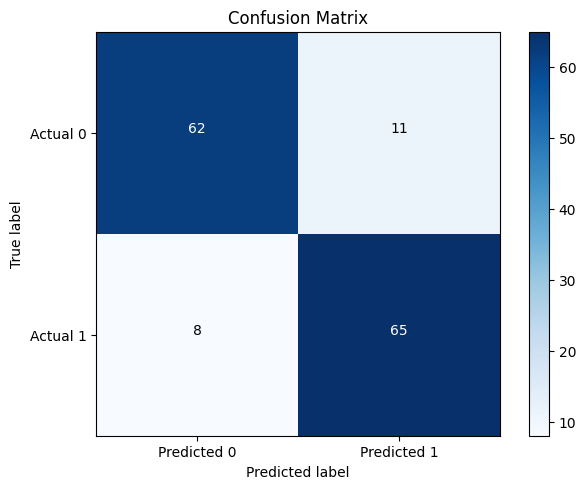

Average Training Time: 0.0572 seconds
Average Testing Time: 0.0045 seconds


In [132]:
from sklearn.metrics import confusion_matrix, classification_report,r2_score
from sklearn import metrics
from sklearn.metrics import cohen_kappa_score
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Actual 0', 'Actual 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


algorithm_names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'SVM',
                    'k-Nearest Neighbors', 'Adaboost Classifier', 'Gaussian', 'Quadratic Discriminant Analysis',
                    'Ridge Classifier', 'Passive Aggressive Classifier']

# Lists to store training and testing times
training_times = []
testing_times = []

for i, algorithm in enumerate(algorithm_names):
    print('Evaluation metrics for', algorithm, ':')

    # Measure training time
    start_train_time = time.time()
    model[i].fit(train_X, train_y)
    end_train_time = time.time()

    # Calculate training time
    training_time = end_train_time - start_train_time
    training_times.append(training_time)
    print(f'Training time: {training_time:.4f} seconds')

    # Measure testing time
    start_test_time = time.time()
    predictions = model[i].predict(test_X)
    end_test_time = time.time()

    # Calculate testing time
    testing_time = end_test_time - start_test_time
    testing_times.append(testing_time)
    print(f'Testing time: {testing_time:.4f} seconds')

    # Confusion Matrix
    cm = confusion_matrix(test_y, predictions)
    TP, TN, FP, FN = cm[0][0], cm[1][1], cm[0][1], cm[1][0]

    # Classification Report
    result1 = classification_report(test_y, predictions)
    print("Classification report:")
    print(result1)

    # Accuracy and other metrics
    accuracy = ((TP + TN) / (TP + TN + FP + FN)) * 100
    precision = TP / (TP + FP)
    specificity = TN / (TN + FP)
    f1_score = 2 * ((TN / (TN + FP)) * (TP / (TP + FN))) / ((TN / (TN + FP)) + (TP / (TP + FN)))
    sensitivity_recall = TP / (TP + FN)
    false_positive_rate = FP / (FP + TN)
    false_negative = FN / (FN + TP)
    negative_predictive_value = TN / (TN + FN)
    false_discovery_rate = FP / (TP + FP)

    print('Testing accuracy:', accuracy)
    print('Precision:', precision)
    print('Specificity:', specificity)
    print('F1 score:', f1_score)
    print('Sensitivity/Recall:', sensitivity_recall)
    print('False positive rate:', false_positive_rate)
    print('False negative:', false_negative)
    print('Negative Predictive Value:', negative_predictive_value)
    print('False Discovery Rate:', false_discovery_rate)

    # Additional Metrics
    print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, predictions))
    print('R Squared Error:', r2_score(test_y, predictions))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_y, predictions)))
    print('Log Loss:', metrics.log_loss(test_y, predictions))
    print('Cohen Kappa Score:', cohen_kappa_score(test_y, predictions))

    print()
    print()
    print(cm)
    plot_confusion_matrix(cm)
# Print average training and testing times
print(f'Average Training Time: {np.mean(training_times):.4f} seconds')
print(f'Average Testing Time: {np.mean(testing_times):.4f} seconds')


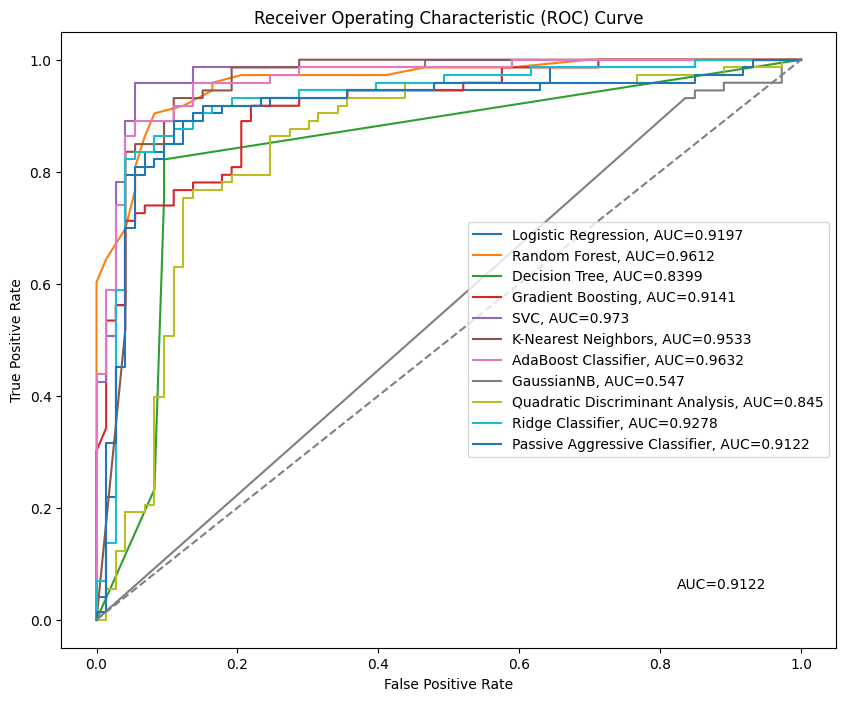

In [133]:
def plot_roc_curve(model, model_name, train_X, train_y, test_X, test_y):
    if not hasattr(model, "fit"):
        print(f"Model {model_name} does not have 'fit' method.")
        return

    model.fit(train_X, train_y)  # Make sure to fit the model before using it

    if hasattr(model, "decision_function"):
        y_score = model.decision_function(test_X)
    elif hasattr(model, "predict_proba"):
        y_score = model.predict_proba(test_X)[:, 1]
    else:
        raise AttributeError(f"Model {model_name} does not have decision_function or predict_proba method.")

    fpr, tpr, _ = roc_curve(test_y, y_score)
    auc_value = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name}, AUC={round(auc_value, 4)}")

    # Adjust the position of the AUC score text
    plt.text(0.95, 0.05, f"AUC={round(auc_value, 4)}", ha='right', va='bottom', backgroundcolor='white')


models = [
    (LogisticRegression(C=0.1), "Logistic Regression"),
    (RandomForestClassifier(max_depth=15, min_samples_split=2, n_estimators=30), "Random Forest"),
    (DecisionTreeClassifier(criterion='gini', max_depth=10), "Decision Tree"),
    (GradientBoostingClassifier(learning_rate=0.1, max_depth=7, n_estimators=150), "Gradient Boosting"),
    (SVC(C=10, kernel='rbf', probability=True), "SVC"),
    (KNeighborsClassifier(n_neighbors=5, weights='distance'), "K-Nearest Neighbors"),
    (AdaBoostClassifier(learning_rate=0.2, n_estimators=150, estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4)), "AdaBoost Classifier"), # Changed base_estimator to estimator
    (GaussianNB(), "GaussianNB"),
    (QuadraticDiscriminantAnalysis(reg_param=0.2), "Quadratic Discriminant Analysis"),
    (RidgeClassifier(alpha=1), "Ridge Classifier"),
    (PassiveAggressiveClassifier(C=0.01, max_iter=1000), "Passive Aggressive Classifier")
]

# Plot ROC curves
plt.figure(figsize=(10, 8))
for model, name in models:
    plot_roc_curve(model, name, train_X, train_y, test_X, test_y)

# Add diagonal line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.show()


In [134]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_params = {'C': [0.01, 0.1, 1, 10, 100]}
log = LogisticRegression(random_state=30)
log_cv = GridSearchCV(log, log_params, cv=5)
log_cv.fit(train_X, train_y)
print("Best parameters for Logistic Regression:", log_cv.best_params_)
print("Best accuracy for Logistic Regression:", log_cv.best_score_)

# Random Forest
forest_params = {
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy']
}
forest = RandomForestClassifier(random_state=25)
forest_cv = GridSearchCV(forest, forest_params, cv=5)
forest_cv.fit(train_X, train_y)
print("Best parameters for Random Forest:", forest_cv.best_params_)
print("Best accuracy for Random Forest:", forest_cv.best_score_)

# Decision Tree
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [5, 10, 20]}
tree = DecisionTreeClassifier(random_state=30)
tree_cv = GridSearchCV(tree, tree_params, cv=5)
tree_cv.fit(train_X, train_y)
print("Best parameters for Decision Tree:", tree_cv.best_params_)
print("Best accuracy for Decision Tree:", tree_cv.best_score_)

# Gradient Boosting
gb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 150, 200]
}
gb_clf = GradientBoostingClassifier(random_state=35)
gb_cv = GridSearchCV(gb_clf, gb_params, cv=5)
gb_cv.fit(train_X, train_y)
print("Best parameters for Gradient Boosting:", gb_cv.best_params_)
print("Best accuracy for Gradient Boosting:", gb_cv.best_score_)

# Support Vector Machine (SVM)
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
svm = SVC(probability=True, random_state=25)
svm_cv = GridSearchCV(svm, svm_params, cv=5)
svm_cv.fit(train_X, train_y)
print("Best parameters for SVM:", svm_cv.best_params_)
print("Best accuracy for SVM:", svm_cv.best_score_)

# k-Nearest Neighbors (KNN)
knn_params = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(train_X, train_y)
print("Best parameters for KNN:", knn_cv.best_params_)
print("Best accuracy for KNN:", knn_cv.best_score_)

# AdaBoost
ada_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'base_estimator__max_depth': [1, 2, 3]
}
clf = AdaBoostClassifier(DecisionTreeClassifier(criterion='gini', random_state=30), random_state=30)
ada_cv = GridSearchCV(clf, ada_params, cv=5)
ada_cv.fit(train_X, train_y)
print("Best parameters for AdaBoost:", ada_cv.best_params_)
print("Best accuracy for AdaBoost:", ada_cv.best_score_)

# Gaussian Naive Bayes
gnb_params = {'var_smoothing': np.logspace(-9, 0, 10)}
gnb = GaussianNB()
gnb_cv = GridSearchCV(gnb, gnb_params, cv=5)
gnb_cv.fit(train_X, train_y)
print("Best parameters for Gaussian Naive Bayes:", gnb_cv.best_params_)
print("Best accuracy for Gaussian Naive Bayes:", gnb_cv.best_score_)

# Quadratic Discriminant Analysis (QDA)
qda_params = {'reg_param': [0.0, 0.1, 0.2, 0.5]}
qda = QuadraticDiscriminantAnalysis()
qda_cv = GridSearchCV(qda, qda_params, cv=5)
qda_cv.fit(train_X, train_y)
print("Best parameters for QDA:", qda_cv.best_params_)
print("Best accuracy for QDA:", qda_cv.best_score_)

# Ridge Classifier
ridge_params = {'alpha': [0.1, 1, 10]}
ridge = RidgeClassifier(random_state=42)
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(train_X, train_y)
print("Best parameters for Ridge Classifier:", ridge_cv.best_params_)
print("Best accuracy for Ridge Classifier:", ridge_cv.best_score_)

# Passive Aggressive Classifier
pa_params = {'C': [0.001, 0.01, 0.1, 1], 'max_iter': [1000, 2000]}
passive_aggressive = PassiveAggressiveClassifier(random_state=42)
pa_cv = GridSearchCV(passive_aggressive, pa_params, cv=5)
pa_cv.fit(train_X, train_y)
print("Best parameters for Passive Aggressive Classifier:", pa_cv.best_params_)
print("Best accuracy for Passive Aggressive Classifier:", pa_cv.best_score_)


Best parameters for Logistic Regression: {'C': 0.1}
Best accuracy for Logistic Regression: 0.8798703212496317
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy for Random Forest: 0.9124668435013262
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 5}
Best accuracy for Decision Tree: 0.8662393162393164
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Best accuracy for Gradient Boosting: 0.9227232537577365
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best accuracy for SVM: 0.9004715590922487
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best accuracy for KNN: 0.8593280282935455


ValueError: Invalid parameter 'base_estimator' for estimator AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=30),
                   random_state=30). Valid parameters are: ['algorithm', 'estimator', 'learning_rate', 'n_estimators', 'random_state'].

In [ ]:
#SEMI supervised

In [ ]:
#autoencoder

In [135]:
def plot_confusion_matrix(cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Shape of df1: (364, 44)
Shape of df2: (365, 44)
Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 1.1864 - val_loss: 1.3553
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1.2012 - val_loss: 1.3444
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1878 - val_loss: 1.3341
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2562 - val_loss: 1.3239
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1899 - val_loss: 1.3136
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1849 - val_loss: 1.3038
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2668 - val_loss: 1.2938
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1394 - val_loss: 1.2837
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.2066 - val_loss: 1.2734
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1248 - val_loss: 1.2628
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1240 - val_loss: 1.2520
Epoch 12/20
10/10

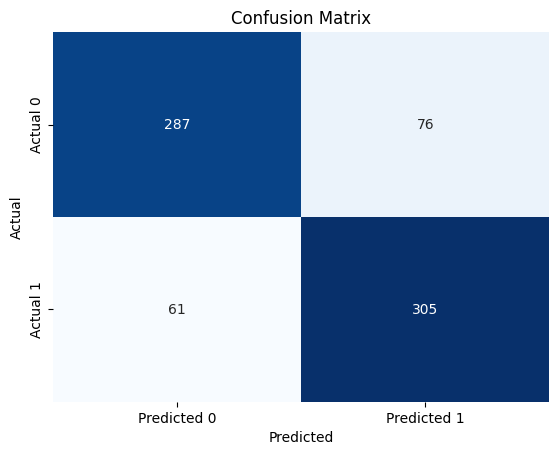

In [136]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, log_loss, cohen_kappa_score
import pandas as pd
import numpy as np

# Define the autoencoder model
class Autoencoder(tf.keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.layers.Dense(latent_dim, activation='relu')
        self.decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Define the downstream classification model
class DownstreamModel(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super(DownstreamModel, self).__init__()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(output_dim, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x


from sklearn.model_selection import train_test_split

# Assuming 'data' is your original dataframe
df1, df2 = train_test_split(df, test_size=0.5, random_state=42)

# Now df1 and df2 will contain 50% of the data each
print(f"Shape of df1: {df1.shape}")
print(f"Shape of df2: {df2.shape}")

X_train, y_train, X_test, y_test = df2[prediction_var], df2['PCOS'], df[prediction_var], df['PCOS']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pretrain the autoencoder
input_dim = X_train_scaled.shape[1]
latent_dim = 10  # adjust as needed
autoencoder = Autoencoder(input_dim, latent_dim)
autoencoder.compile(optimizer='adam', loss='mse')  # adjust loss as needed
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

# Extract encoded features from labeled data
encoded_train = autoencoder.encoder(X_train_scaled).numpy()

# Define downstream classifier
output_dim = len(np.unique(y_train))
classifier = DownstreamModel(latent_dim, output_dim)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train classifier using encoded features and labels
classifier.fit(encoded_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Extract encoded features from unlabeled data
encoded_test = autoencoder.encoder(X_test_scaled).numpy()

# Evaluate classifier on unlabeled data
y_pred = np.argmax(classifier.predict(encoded_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on unlabeled data:", accuracy)

y_pred = classifier.predict(encoded_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)
cm = confusion_matrix(y_test, y_pred_classes)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
false_positive_rate = FP / (FP + TN)
false_negative = FN / (FN + TP)
negative_predictive_value = TN / (TN + FN)
false_discovery_rate = FP / (TP + FP)
mean_absolute_error = np.mean(np.abs(y_test, y_pred_classes))
r_squared_error = r2_score(y_test, y_pred_classes)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred_classes))
log_loss_value = log_loss(y_test, y_pred_classes)
cohen_kappa = cohen_kappa_score(y_test, y_pred_classes)




print('Testing accuracy:', accuracy)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1 score:', f1)
print('Sensitivity/Recall:', recall)
print('False positive rate:', false_positive_rate)
print('False negative:', false_negative)
print('Negative Predictive Value:', negative_predictive_value)
print('False Discovery Rate:', false_discovery_rate)
print('Mean Absolute Error:', mean_absolute_error)
print('R Squared Error:', r_squared_error)
print('Root Mean Squared Error:', root_mean_squared_error)
print('Log Loss:', log_loss_value)
print('Cohen Kappa Score:', cohen_kappa)
plot_confusion_matrix(cm)
print()
print()

In [ ]:
#S3VM

Testing accuracy: 0.8820301783264746
Precision: 0.8664921465968587
Specificity: 0.859504132231405
F1 score: 0.8850267379679144
Sensitivity/Recall: 0.9043715846994536
False positive rate: 0.14049586776859505
False negative: 0.09562841530054644
Negative Predictive Value: 0.899135446685879
False Discovery Rate: 0.13350785340314136
Mean Absolute Error: 0.5020576131687243
R Squared Error: 1.0
Root Mean Squared Error: 0.0
Log Loss: 2.2204460492503136e-16
Cohen Kappa Score: 1.0
Confusion Matrix:
[[312  51]
 [ 35 331]]


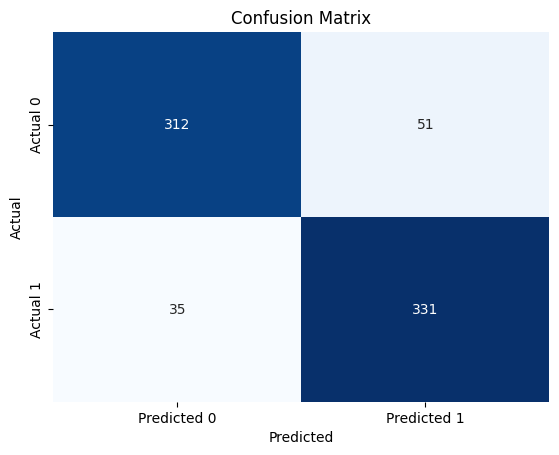

In [137]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, log_loss, cohen_kappa_score
from sklearn.svm import SVC

X_train, y_train, X_test, y_test = df2[prediction_var], df2['PCOS'], df[prediction_var], df['PCOS']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the semi-supervised SVM
s3vm = SVC(kernel='linear', probability=True)
s3vm.fit(X_train_scaled, y_train)

# Predict labels for unlabeled data
y_pred = s3vm.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
false_positive_rate = FP / (FP + TN)
false_negative = FN / (FN + TP)
negative_predictive_value = TN / (TN + FN)
false_discovery_rate = FP / (TP + FP)
mean_absolute_error = np.mean(np.abs(y_test, y_pred))
r_squared_error = r2_score(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
log_loss_value = log_loss(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)



# Print evaluation metrics
print('Testing accuracy:', accuracy)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1 score:', f1)
print('Sensitivity/Recall:', recall)
print('False positive rate:', false_positive_rate)
print('False negative:', false_negative)
print('Negative Predictive Value:', negative_predictive_value)
print('False Discovery Rate:', false_discovery_rate)
print('Mean Absolute Error:', mean_absolute_error)
print('R Squared Error:', r_squared_error)
print('Root Mean Squared Error:', root_mean_squared_error)
print('Log Loss:', log_loss_value)
print('Cohen Kappa Score:', cohen_kappa)
print('Confusion Matrix:')
print(cm)
plot_confusion_matrix(cm)

In [ ]:
#GAN

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9881   
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8756 
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7677 
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6658 
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5779 
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5099 
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4467 
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3982 
Epoch 9/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3550 
Epoch 10/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3184 
Epoch 11/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2887 
Epoch 12/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2666 
Epoch 13/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2477 
Epoch 14/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2322
Epoch 15/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2208  
Ep

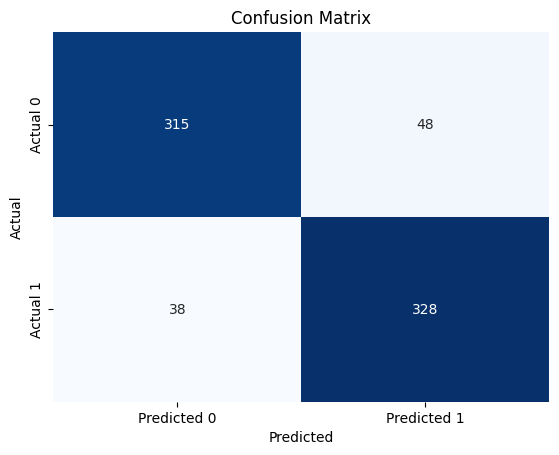

In [138]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, log_loss, cohen_kappa_score
import pandas as pd
import numpy as np

# Define the generator model
class Generator(tf.keras.Model):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.dense = tf.keras.layers.Dense(64, activation='relu')
        self.output_layer = tf.keras.layers.Dense(output_dim, activation='sigmoid')

    def call(self, inputs):
        x = self.dense(inputs)
        return self.output_layer(x)

# Define the discriminator model
class Discriminator(tf.keras.Model):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        return self.dense2(x)

# Define the downstream classification model
class DownstreamModel(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super(DownstreamModel, self).__init__()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(output_dim, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x


# Separate features and labels
X_train, y_train, X_test, y_test = df2[prediction_var], df2['PCOS'], df[prediction_var], df['PCOS']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define GAN parameters
latent_dim = 10  # adjust as needed
output_dim = X_train_scaled.shape[1]

# Create GAN components
generator = Generator(latent_dim, output_dim)
discriminator = Discriminator(output_dim)

# Compile discriminator
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Compile generator
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(latent_dim,))
gan_output = discriminator(generator(gan_input))
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(optimizer='adam', loss='binary_crossentropy')

# Train GAN
gan.fit(np.random.randn(len(X_train_scaled), latent_dim), np.ones((len(X_train_scaled), 1)), epochs=20, batch_size=32)

# Generate synthetic data with the generator
synthetic_data = generator.predict(np.random.randn(len(X_train_scaled), latent_dim))

# Train downstream classifier using real and synthetic data
X_combined = np.vstack((X_train_scaled, synthetic_data))
y_combined = np.hstack((y_train, y_train))  # assuming same labels for real and synthetic data
classifier = DownstreamModel(input_dim, output_dim)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(X_combined, y_combined, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate classifier on test data
y_pred = np.argmax(classifier.predict(X_test_scaled), axis=1)
accuracy = accuracy_score(y_test, y_pred)

# Calculate other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
false_positive_rate = FP / (FP + TN)
false_negative = FN / (FN + TP)
negative_predictive_value = TN / (TN + FN)
false_discovery_rate = FP / (TP + FP)
mean_absolute_error = np.mean(np.abs(y_test - y_pred))
r_squared_error = r2_score(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
log_loss_value = log_loss(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Print evaluation metrics
print('Testing accuracy:', accuracy)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1 score:', f1)
print('Sensitivity/Recall:', recall)
print('False positive rate:', false_positive_rate)
print('False negative:', false_negative)
print('Negative Predictive Value:', negative_predictive_value)
print('False Discovery Rate:', false_discovery_rate)
print('Mean Absolute Error:', mean_absolute_error)
print('R Squared Error:', r_squared_error)
print('Root Mean Squared Error:', root_mean_squared_error)
print('Log Loss:', log_loss_value)
print('Cohen Kappa Score:', cohen_kappa)
plot_confusion_matrix(cm)


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


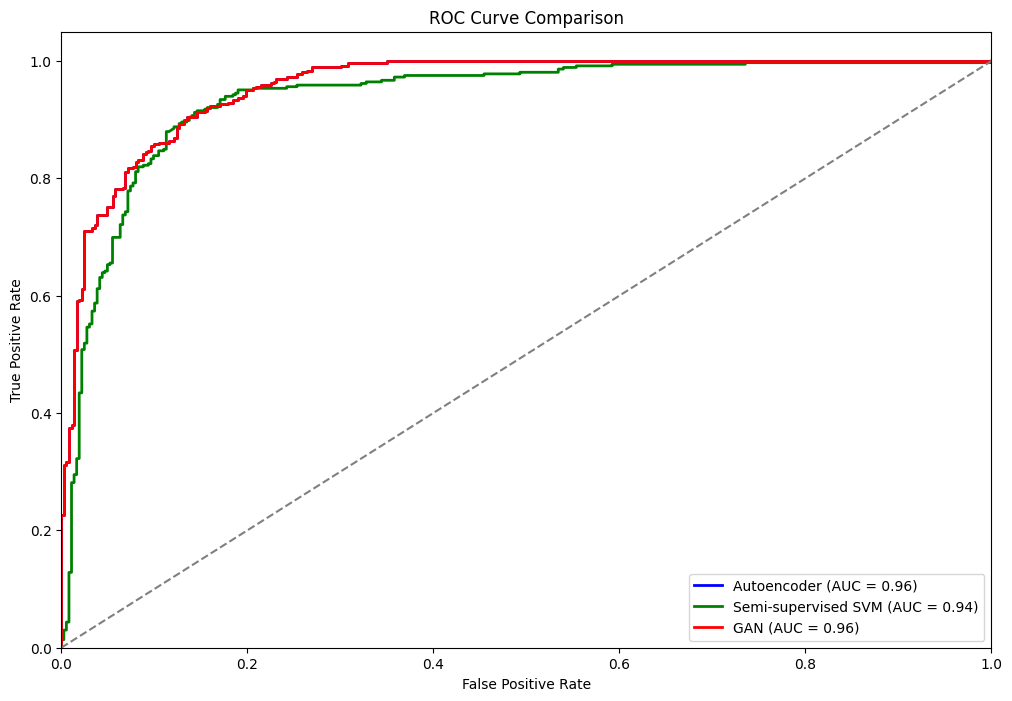

In [139]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve for a model
def plot_roc_curve(y_test, y_pred_proba, model_name, color):
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    return roc_auc

# Initialize the plot
plt.figure(figsize=(12, 8))

### 1. Autoencoder with downstream classifier
y_pred_proba_autoencoder = classifier.predict(X_test_scaled)
autoencoder_auc = plot_roc_curve(y_test, y_pred_proba_autoencoder, 'Autoencoder', 'blue')

### 2. Semi-supervised SVM
y_pred_proba_svm = s3vm.predict_proba(X_test_scaled)
svm_auc = plot_roc_curve(y_test, y_pred_proba_svm, 'Semi-supervised SVM', 'green')

### 3. GAN with downstream classifier
y_pred_proba_gan = classifier.predict(X_test_scaled)
gan_auc = plot_roc_curve(y_test, y_pred_proba_gan, 'GAN', 'red')

# Plot settings
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#SELF supervised

In [ ]:
#Autoencoder

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.1740 - val_loss: 1.3568
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1972 - val_loss: 1.3449
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1828 - val_loss: 1.3339
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2311 - val_loss: 1.3235
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.1965 - val_loss: 1.3134
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1659 - val_loss: 1.3034
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2021 - val_loss: 1.2934
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1891 - val_loss: 1.2838
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0840 - val_loss: 1.2738
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1622 - val_loss: 1.2639
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1152 - val_loss: 1.2541
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.191

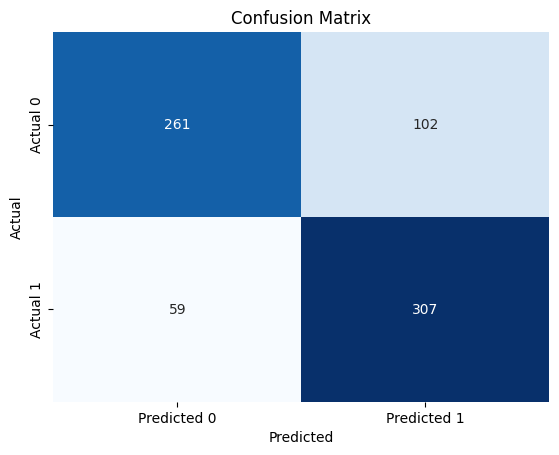

In [140]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, log_loss, cohen_kappa_score
import pandas as pd
import numpy as np

# Define the autoencoder model
class Autoencoder(tf.keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = tf.keras.layers.Dense(latent_dim, activation='relu')
        self.decoder = tf.keras.layers.Dense(input_dim, activation='sigmoid')

    def call(self, inputs):
        encoded = self.encoder(inputs)
        decoded = self.decoder(encoded)
        return decoded

# Define the downstream classification model
class DownstreamModel(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super(DownstreamModel, self).__init__()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(output_dim, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

X_train, y_train, X_test, y_test = df2[prediction_var], df2['PCOS'], df[prediction_var], df['PCOS']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Pretrain the autoencoder on labeled data
input_dim = X_train_scaled.shape[1]
latent_dim = 10  # adjust as needed
autoencoder = Autoencoder(input_dim, latent_dim)
autoencoder.compile(optimizer='adam', loss='mse')  # adjust loss as needed
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

# Extract encoded features from labeled data
encoded_train = autoencoder.encoder(X_train_scaled).numpy()

# Extract encoded features from unlabeled data
encoded_test = autoencoder.encoder(X_test_scaled).numpy()

# Define downstream classifier
output_dim = len(np.unique(y_train))
classifier = DownstreamModel(latent_dim, output_dim)
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train classifier using encoded features and labels
classifier.fit(encoded_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate classifier on unlabeled data
y_pred = np.argmax(classifier.predict(encoded_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy on unlabeled data:", accuracy)

probs_autoencoder = classifier.predict(encoded_test)
# Calculate other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# Calculate other evaluation metrics
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
false_positive_rate = FP / (FP + TN)
false_negative = FN / (FN + TP)
negative_predictive_value = TN / (TN + FN)
false_discovery_rate = FP / (TP + FP)
mean_absolute_error = np.mean(np.abs(y_test - y_pred))
r_squared_error = r2_score(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
log_loss_value = log_loss(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Print evaluation metrics
print('Testing accuracy:', accuracy)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1 score:', f1)
print('Sensitivity/Recall:', recall)
print('False positive rate:', false_positive_rate)
print('False negative:', false_negative)
print('Negative Predictive Value:', negative_predictive_value)
print('False Discovery Rate:', false_discovery_rate)
print('Mean Absolute Error:', mean_absolute_error)
print('R Squared Error:', r_squared_error)
print('Root Mean Squared Error:', root_mean_squared_error)
print('Log Loss:', log_loss_value)
print('Cohen Kappa Score:', cohen_kappa)
print('Confusion Matrix:')
print(cm)
plot_confusion_matrix(cm)

In [ ]:
#simclr_model

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.5149 - loss: 0.6948 - val_accuracy: 0.6027 - val_loss: 0.7051
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6646 - loss: 0.6432 - val_accuracy: 0.6712 - val_loss: 0.6860
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7262 - loss: 0.6084 - val_accuracy: 0.6986 - val_loss: 0.6737
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7715 - loss: 0.5785 - val_accuracy: 0.7260 - val_loss: 0.6628
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7855 - loss: 0.5445 - val_accuracy: 0.7260 - val_loss: 0.6530
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7526 - loss: 0.5337 - val_accuracy: 0.7397 - val_loss: 0.6487
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7638 - loss: 0.5176 - val_accuracy: 0.7123 - val_loss: 0.6477
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7991 - loss: 0.4778 - val_accuracy: 0.6849 - v

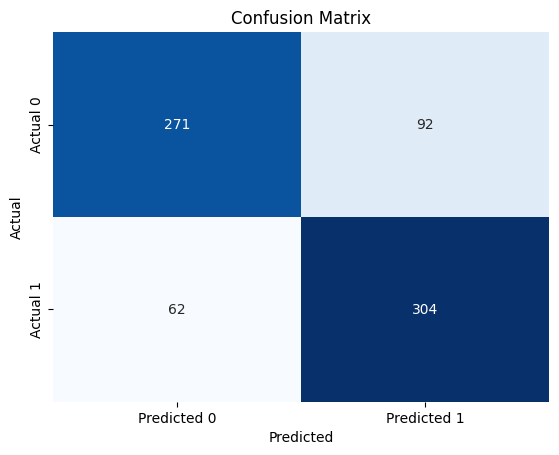

In [141]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, log_loss, cohen_kappa_score
import pandas as pd
import numpy as np

# Define the SimCLR model
class SimCLRModel(tf.keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(SimCLRModel, self).__init__()
        self.encoder = tf.keras.layers.Dense(latent_dim, activation='relu')
        self.projection_head = tf.keras.layers.Dense(latent_dim)

    def call(self, inputs):
        encoded = self.encoder(inputs)
        projection = self.projection_head(encoded)
        return encoded, projection

# Define the downstream classification model
class DownstreamModel(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super(DownstreamModel, self).__init__()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(output_dim, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x

# Separate features and labels
X_train, y_train, X_test, y_test = df2[prediction_var], df2['PCOS'], df[prediction_var], df['PCOS']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the SimCLR model and compile
input_dim = X_train_scaled.shape[1]
latent_dim = 10  # adjust as needed
simclr_model = SimCLRModel(input_dim, latent_dim)
simclr_model.compile(optimizer='adam', loss='mse')  # adjust loss as needed

# Train SimCLR
encoded_train, _ = simclr_model(X_train_scaled)
encoded_test, _ = simclr_model(X_test_scaled)

# Define downstream classifier
output_dim = len(np.unique(y_train))
classifier2 = DownstreamModel(latent_dim, output_dim)
classifier2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train classifier using encoded features and labels
classifier2.fit(encoded_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate classifier on unlabeled data
y_pred = np.argmax(classifier2.predict(encoded_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)


probs_simclr = classifier2.predict(encoded_test)
# Calculate other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# Calculate other evaluation metrics
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
false_positive_rate = FP / (FP + TN)
false_negative = FN / (FN + TP)
negative_predictive_value = TN / (TN + FN)
false_discovery_rate = FP / (TP + FP)
mean_absolute_error = np.mean(np.abs(y_test - y_pred))
r_squared_error = r2_score(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
log_loss_value = log_loss(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Print evaluation metrics
print('Testing accuracy:', accuracy)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1 score:', f1)
print('Sensitivity/Recall:', recall)
print('False positive rate:', false_positive_rate)
print('False negative:', false_negative)
print('Negative Predictive Value:', negative_predictive_value)
print('False Discovery Rate:', false_discovery_rate)
print('Mean Absolute Error:', mean_absolute_error)
print('R Squared Error:', r_squared_error)
print('Root Mean Squared Error:', root_mean_squared_error)
print('Log Loss:', log_loss_value)
print('Cohen Kappa Score:', cohen_kappa)
print('Confusion Matrix:')
print(cm)
plot_confusion_matrix(cm)

In [ ]:
#byol_model

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5381 - loss: 0.6912 - val_accuracy: 0.5479 - val_loss: 0.6921
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6109 - loss: 0.6709 - val_accuracy: 0.6438 - val_loss: 0.6767
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6535 - loss: 0.6622 - val_accuracy: 0.6164 - val_loss: 0.6637
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6404 - loss: 0.6543 - val_accuracy: 0.6575 - val_loss: 0.6522
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6798 - loss: 0.6378 - val_accuracy: 0.6849 - val_loss: 0.6408
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6789 - loss: 0.6259 - val_accuracy: 0.6849 - val_loss: 0.6299
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6750 - loss: 0.6154 - val_accuracy: 0.6849 - val_loss: 0.6209
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7184 - loss: 0.5980 - val_accuracy: 0.6986 - v

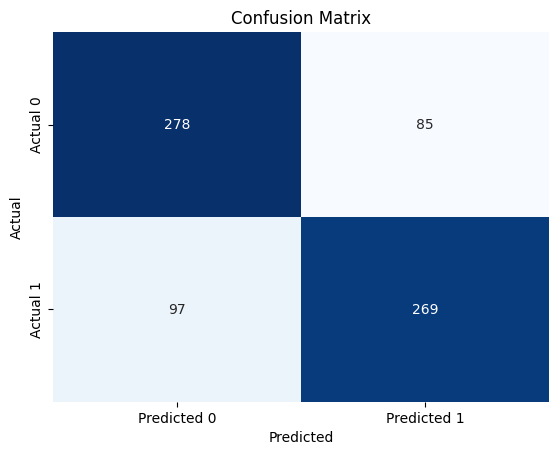

In [142]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_absolute_error, r2_score, mean_squared_error, log_loss, cohen_kappa_score
import pandas as pd
import numpy as np

# Define the BYOL model
class BYOLModel(tf.keras.Model):
    def __init__(self, input_dim, latent_dim):
        super(BYOLModel, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(latent_dim)
        ])
        self.projector = tf.keras.Sequential([
            tf.keras.layers.Dense(256, activation='relu'),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(latent_dim)
        ])

    def call(self, inputs):
        return self.encoder(inputs), self.projector(inputs)

# Define the downstream classification model
class DownstreamModel(tf.keras.Model):
    def __init__(self, input_dim, output_dim):
        super(DownstreamModel, self).__init__()
        self.fc1 = tf.keras.layers.Dense(64, activation='relu')
        self.fc2 = tf.keras.layers.Dense(output_dim, activation='softmax')

    def call(self, inputs):
        x = self.fc1(inputs)
        x = self.fc2(x)
        return x


# Separate features and labels
X_train, y_train, X_test, y_test = df2[prediction_var], df2['PCOS'], df[prediction_var], df['PCOS']
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the BYOL model and compile
input_dim = X_train_scaled.shape[1]
latent_dim = 10  # adjust as needed
byol_model = BYOLModel(input_dim, latent_dim)
byol_model.compile(optimizer='adam', loss='mse')  # adjust loss as needed

# Train BYOL
encoded_train, _ = byol_model(X_train_scaled)
encoded_test, _ = byol_model(X_test_scaled)

# Define downstream classifier
output_dim = len(np.unique(y_train))
classifier3 = DownstreamModel(latent_dim, output_dim)
classifier3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train classifier using encoded features and labels
classifier3.fit(encoded_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate classifier on unlabeled data
y_pred = np.argmax(classifier3.predict(encoded_test), axis=1)
accuracy = accuracy_score(y_test, y_pred)


probs_byol = classifier3.predict(encoded_test)
# Calculate other evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# Calculate other evaluation metrics
TN, FP, FN, TP = cm.ravel()
specificity = TN / (TN + FP)
false_positive_rate = FP / (FP + TN)
false_negative = FN / (FN + TP)
negative_predictive_value = TN / (TN + FN)
false_discovery_rate = FP / (TP + FP)
mean_absolute_error = np.mean(np.abs(y_test - y_pred))
r_squared_error = r2_score(y_test, y_pred)
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, y_pred))
log_loss_value = log_loss(y_test, y_pred)
cohen_kappa = cohen_kappa_score(y_test, y_pred)

# Print evaluation metrics
print('Testing accuracy:', accuracy)
print('Precision:', precision)
print('Specificity:', specificity)
print('F1 score:', f1)
print('Sensitivity/Recall:', recall)
print('False positive rate:', false_positive_rate)
print('False negative:', false_negative)
print('Negative Predictive Value:', negative_predictive_value)
print('False Discovery Rate:', false_discovery_rate)
print('Mean Absolute Error:', mean_absolute_error)
print('R Squared Error:', r_squared_error)
print('Root Mean Squared Error:', root_mean_squared_error)
print('Log Loss:', log_loss_value)
print('Cohen Kappa Score:', cohen_kappa)
print('Confusion Matrix:')
print(cm)
plot_confusion_matrix(cm)


In [143]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, probas_dict, model_names):
    plt.figure(figsize=(12, 8))

    for name, probs in probas_dict.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Different Models')
    plt.legend(loc='lower right')
    plt.show()

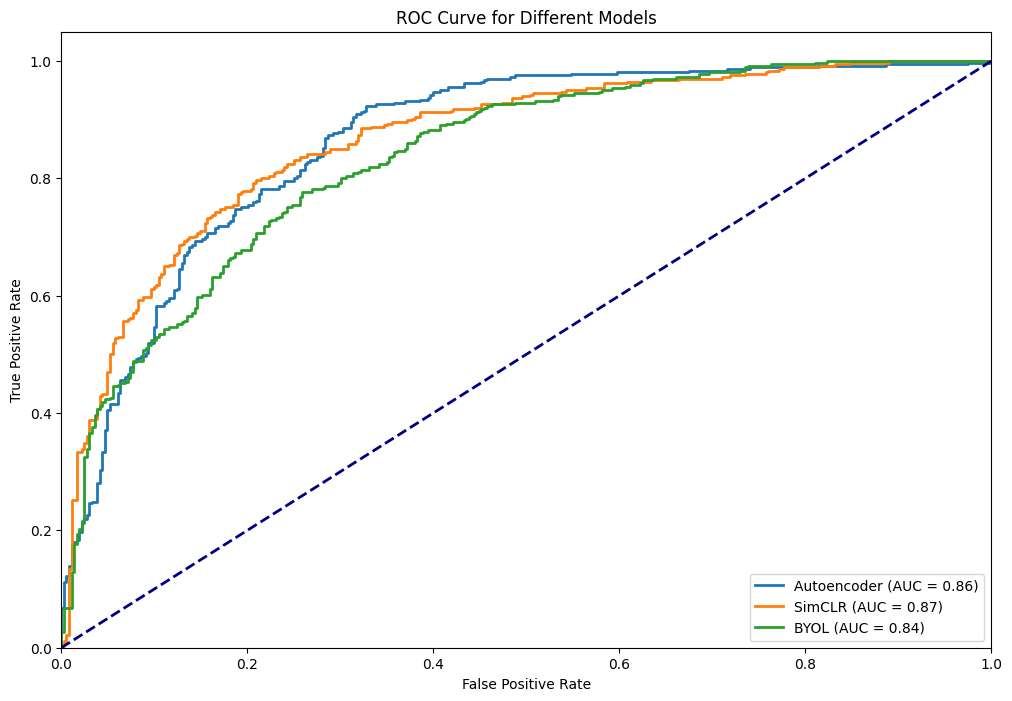

In [144]:
# True labels
y_true = y_test

# Dictionary of predicted probabilities
probas_dict = {
    'Autoencoder': probs_autoencoder[:, 1],  # Assuming binary classification
    'SimCLR': probs_simclr[:, 1],  # Assuming binary classification
    'BYOL': probs_byol[:, 1]  # Assuming binary classification
}

# Model names
model_names = ['Autoencoder', 'SimCLR', 'BYOL']

# Plot ROC curves
plot_roc_curve(y_true, probas_dict, model_names)


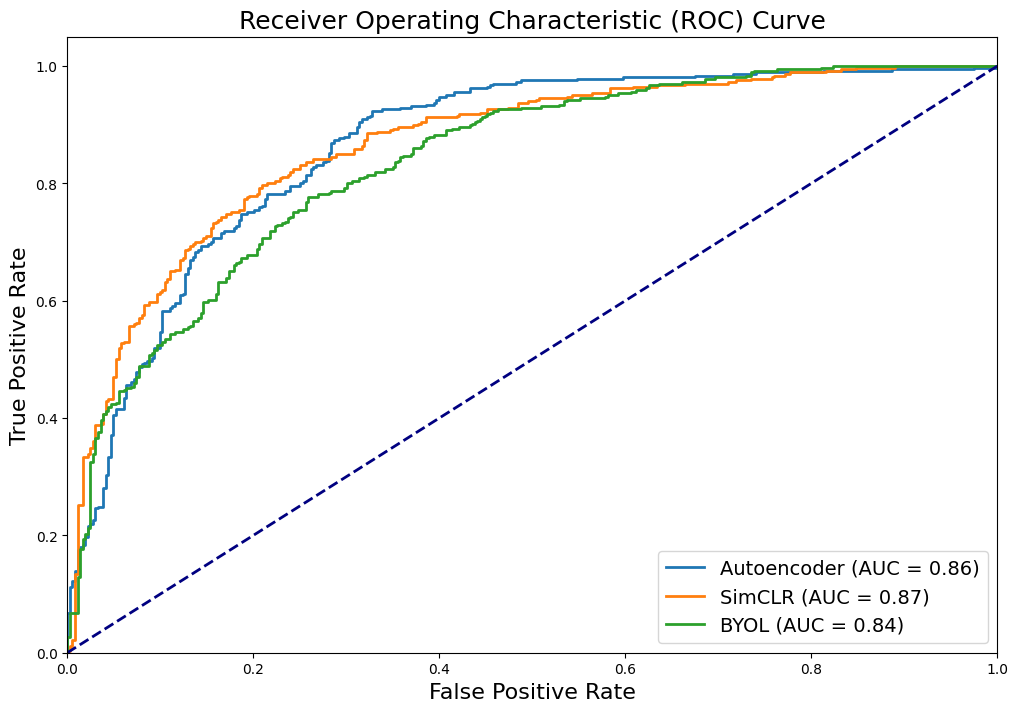

In [147]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, probas_dict, model_names):
    plt.figure(figsize=(12, 8))

    for name, probs in probas_dict.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Add diagonal reference line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Adjusting font sizes for better readability
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
    plt.legend(loc='lower right', fontsize=14)

    # Display the plot
    plt.show()

# True labels
y_true = y_test

# Dictionary of predicted probabilities
probas_dict = {
    'Autoencoder': probs_autoencoder[:, 1],  # Assuming binary classification
    'SimCLR': probs_simclr[:, 1],  # Assuming binary classification
    'BYOL': probs_byol[:, 1]  # Assuming binary classification
}

# Model names
model_names = ['Autoencoder', 'SimCLR', 'BYOL']

# Plot ROC curves
plot_roc_curve(y_true, probas_dict, model_names)



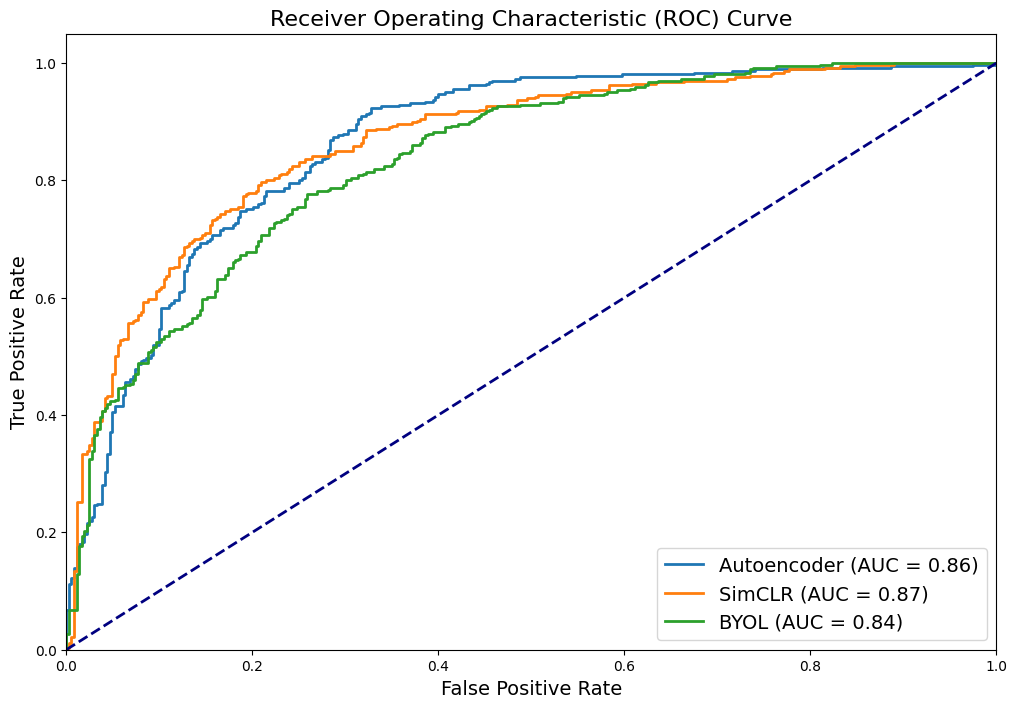

In [153]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, probas_dict, model_names, save_path="roc_curve_output.png"):
    plt.figure(figsize=(12, 8))

    for name, probs in probas_dict.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Add diagonal reference line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Adjusting font sizes for better readability
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
    plt.legend(loc='lower right', fontsize=14)

    # Save the plot before displaying
    plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Display the plot
    plt.show()

# True labels
y_true = y_test

# Dictionary of predicted probabilities
probas_dict = {
    'Autoencoder': probs_autoencoder[:, 1],  # Assuming binary classification
    'SimCLR': probs_simclr[:, 1],  # Assuming binary classification
    'BYOL': probs_byol[:, 1]  # Assuming binary classification
}

# Model names
model_names = ['Autoencoder', 'SimCLR', 'BYOL']

# Plot and save ROC curves
plot_roc_curve(y_true, probas_dict, model_names)


In [152]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

# Function to plot and save ROC curve
def plot_roc_curve(y_true, probas_dict, model_names, save_path="roc_curve.png"):
    plt.figure(figsize=(12, 8))

    for name, probs in probas_dict.items():
        fpr, tpr, _ = roc_curve(y_true, probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

    # Add diagonal reference line
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # Adjusting font sizes for better readability
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=18)
    plt.legend(loc='lower right', fontsize=14)

    # Save the plot
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()

# Generate ROC curve image
plot_roc_curve(y_true, probas_dict, model_names)

# Load the saved image
image = cv2.imread("roc_curve.png")

# Convert to grayscale and apply threshold to remove white space
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Find contours and get bounding box of the ROC curve
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
x, y, w, h = cv2.boundingRect(contours[0])

# Crop the image
cropped_image = image[y:y+h, x:x+w]

# Save cropped image
cv2.imwrite("roc_curve_cropped.png", cropped_image)

# Load the cropped image using PIL
cropped = Image.open("roc_curve_cropped.png")

# Create a new blank white image
new_img = Image.new("RGB", (cropped.width + 100, cropped.height + 100), "white")

# Paste the cropped image into the new canvas
new_img.paste(cropped, (50, 50))

# Save the final formatted image
new_img.save("roc_curve_final.png")

# Display the final image
new_img.show()


In [151]:

Axis titles ("False Positive Rate" and "True Positive Rate")
Axis tick labels (the numbers along each axis)
Legend text (classifier names and AUC values)
The main title ("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.tick_params(axis='both', labelsize=12)
plt.legend(fontsize=12)

SyntaxError: invalid syntax (<ipython-input-151-1d6a00ad9d80>, line 1)